With-in-Sum-of-Squares (WSS): WSS is the total distance of data points from their respective cluster centroids
Total-Sum-of-Squares (TSS): TSS is the total distance of data points from global mean of data, for a given dataset this quantity is going to be constant
Between-Sum-of-Squares (BSS): BSS is the total weighted distance of various cluster centroids to the global mean of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def calcularBSS(df,features):
    centroid_global = df[features].mean()
    bss = 0
    for cluster_label in df['cluster'].unique():
        cluster_points = df[df['cluster'] == cluster_label]
        centroid_cluster = cluster_points[features].mean()
        distance_squared = np.sum((centroid_cluster - centroid_global)**2)
        bss += distance_squared

    return bss

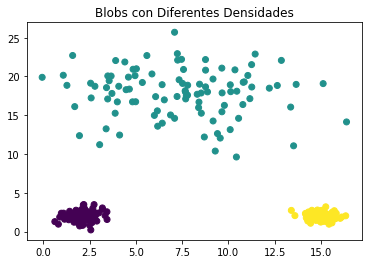

In [2]:
# Crear blobs con diferentes densidades
X1, y1 = make_blobs(n_samples=300, centers=([2, 2], [7, 18], [15, 2]), cluster_std=[0.6, 3.5, 0.5], random_state=10)
# Visualizar los blobs
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title("Blobs con Diferentes Densidades")
plt.show()

In [3]:
df = pd.DataFrame(X1, columns = ['X','y'])

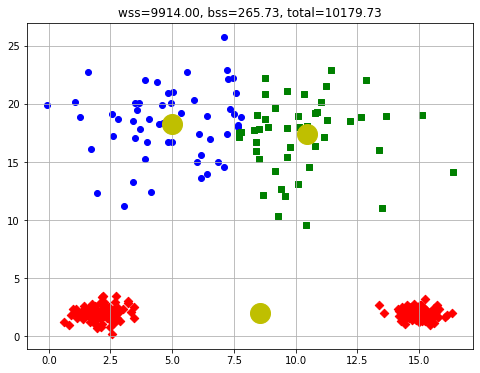

1


In [6]:
n_clusters = 3
k_means = KMeans(n_clusters=n_clusters,  n_init=1, max_iter=1, init='random', random_state=2)
#k_means = KMeans(n_clusters=n_clusters, init='random')

k_means.fit(df)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
df["cluster"] = etiquetas
wss = k_means.inertia_
bss = calcularBSS(df, ['X', 'y'])
total = wss+bss
df["cluster"].unique()
n_clu = df["cluster"].unique()
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
for i in n_clu:
    x = df[df["cluster"]==i]["X"]
    y = df[df["cluster"]==i]["y"]
    plt.scatter(x, y, marker=markers[i%len(markers)], color=colors[i%len(colors)])

plt.plot(centroides[:,0],centroides[:,1],'yo', markersize=20, label='centroides')
plt.title(f"wss={wss:.2f}, bss={bss:.2f}, total={total:.2f}")
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()
print(k_means.n_iter_)
